In [1]:
from ml_aos.lightning import WaveNet
from ml_aos.dataloader import Donuts
import numpy as np
import pandas as pd
model=WaveNet.load_from_checkpoint('/astro/users/driemann/ml-aos/lightning_logs/version_4/checkpoints/epoch=169-step=25670.ckpt')
model.eval()

WaveNet(
  (donut_net): DonutNet(
    (layers): ModuleList(
      (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): DownBlock(
        (layers): ModuleList(
          (0): SkipBlock(
            (layers): Sequential(
              (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
              (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU(inplace=True)
            )
          )
          (1): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (3): ReLU(inplace=True)
        )
      )
      (4): DownBlock(
        (layers): ModuleList(
          (0): SkipBlock(
            (layers): Sequential(
              (0): Conv2d(16, 16, kernel_size=(3, 3

In [2]:
test=Donuts('test')
#pred=model(test[0]['image'][None, ...], test[0]['intrafocal'][None, ...])
#true=test[0]['dof']

In [3]:
#mse=pred-true
#mse=mse.detach().numpy().flatten()
#mse=np.mean(mse**2)
#mse

In [4]:
mses = []
for i in range(2**10):
    true = test[i]['dof']
    pred = model(test[i]['image'][None, ...], 
                  test[i]['intrafocal'][None, ...])
    dif=(pred-true).detach().numpy().flatten()
    mses.append(np.mean(dif**2))

mses = np.array(mses)

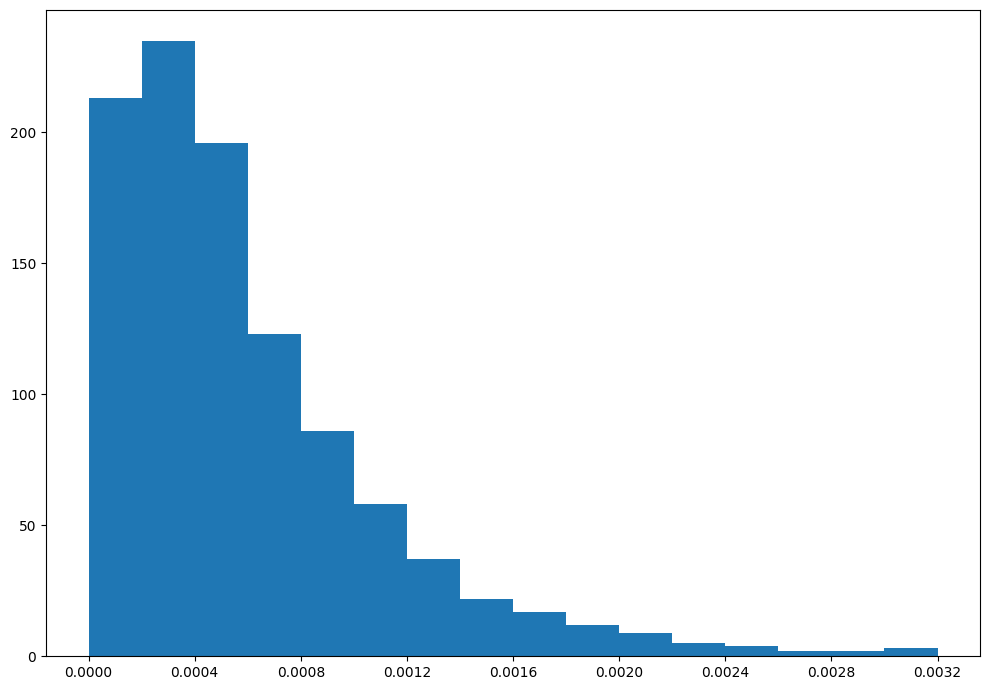

In [6]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 1,
    figsize =(10, 7),
    tight_layout = True)
bins=np.linspace(0,.0032, 17)
xticks=np.linspace(0, .0032, 9)
axs.hist(mses, bins = bins)
axs.set_xticks(xticks)

plt.show()

<font size="5">Shown Above is Histogram of Mean Squared error of all 1024 images in test set</font>

In [7]:
extrafocal= []
intrafocal= []
for i in range(2**10):
    if test[i]['intrafocal']== 0:
        true = test[i]['dof']
        pred = model(test[i]['image'][None, ...], 
                  test[i]['intrafocal'][None, ...])
        dif=(pred-true).detach().numpy().flatten()
        extrafocal.append(np.mean(dif**2))
    else:
        true = test[i]['dof']
        pred = model(test[i]['image'][None, ...], 
                  test[i]['intrafocal'][None, ...])
        dif=(pred-true).detach().numpy().flatten()
        intrafocal.append(np.mean(dif**2))
                          
intrafocal=np.array(intrafocal)
extrafocal=np.array(extrafocal)

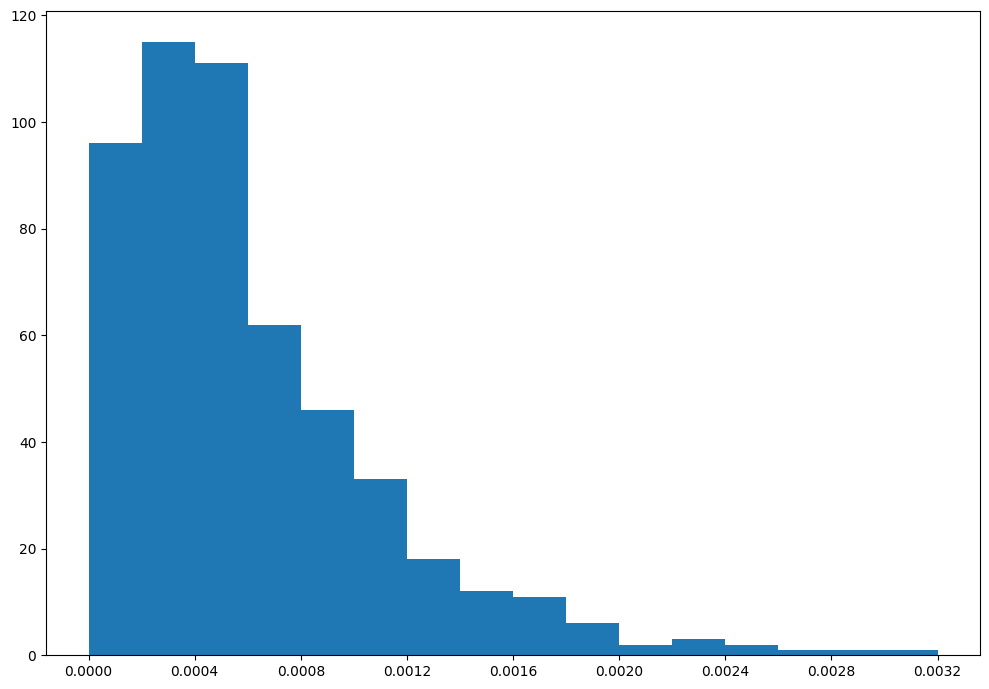

In [8]:
fig, axs = plt.subplots(1, 1,
    figsize =(10, 7),
    tight_layout = True)
bins=np.linspace(0,.0032, 17)
xticks=np.linspace(0, .0032, 9)
axs.hist(intrafocal, bins = bins)
axs.set_xticks(xticks)

plt.show()

<font size="5">Shown Above is Histogram of Mean Squared error of Intrafocal images|</font>

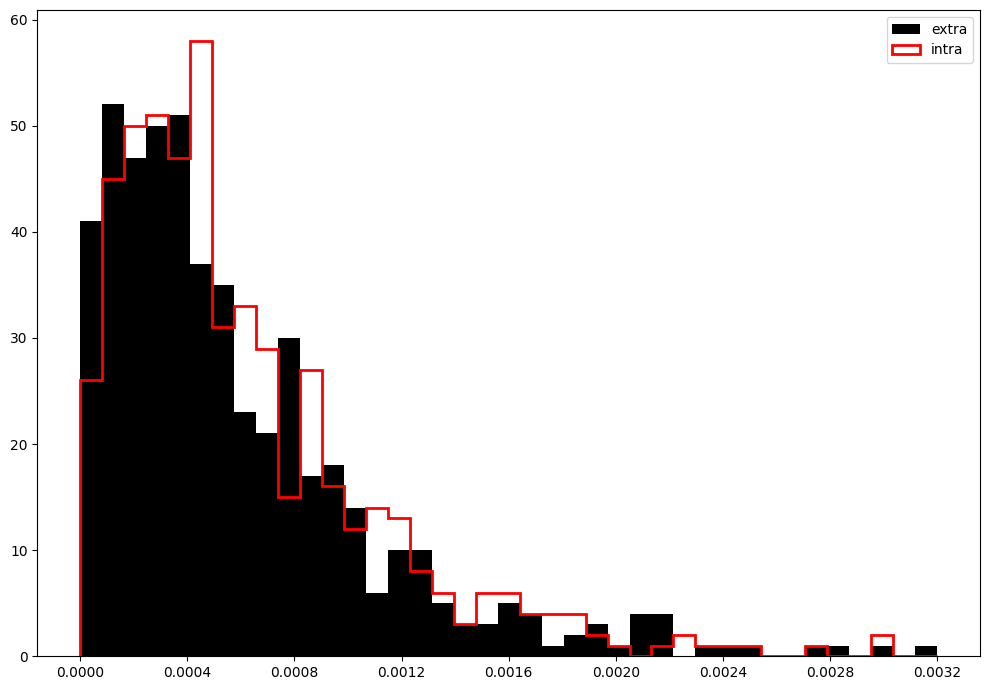

In [54]:
fig, axs = plt.subplots(1, 1,
    figsize =(10, 7),
    tight_layout = True)
bins=np.linspace(0,.0032, 40)
xticks=np.linspace(0, .0032, 9)
axs.hist(extrafocal, bins = bins, color="k", label="extra")
axs.hist(intrafocal, bins = bins, histtype='step', color="r", label="intra", lw=2)
axs.legend()
axs.set_xticks(xticks)

plt.show()

<font size="5">Shown Above is Histogram of Mean Squared error of Extrafocal images</font>

In [43]:
snr = []
background = []
for i in range(2**10):
    flux = test[i]['flux'].detach().numpy().flatten()
    bg = test[i]['background'].detach().numpy().flatten()
    snr.append(flux/bg)
    background.append(bg)

snr = np.array(snr)
background= np.array(background)

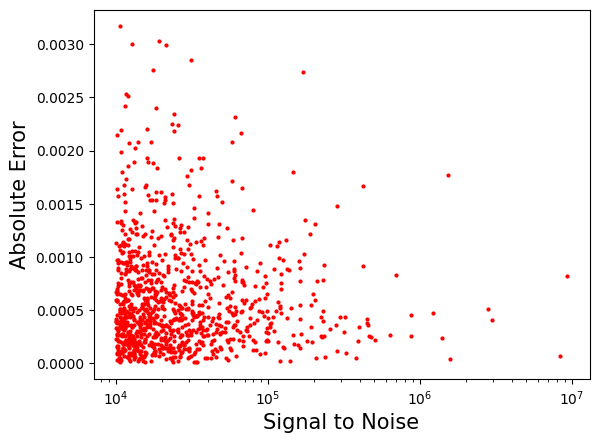

In [55]:
plt.scatter(snr, mses, s=4, color='red')
plt.xlabel('Signal to Noise', fontsize=15)
plt.ylabel('Absolute Error', fontsize=15)
plt.xscale('log')
plt.show()

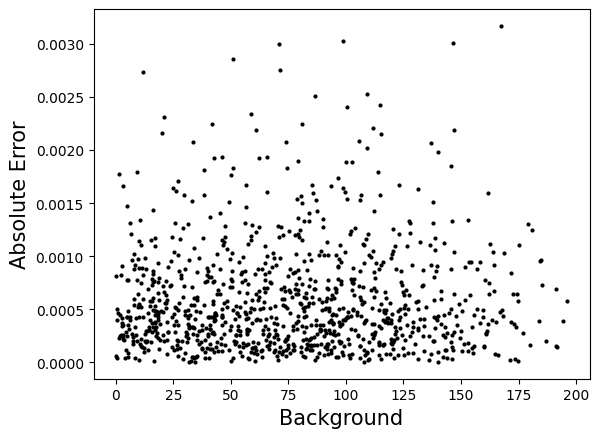

In [46]:
plt.scatter(background, mses, s=4, color='black')
plt.xlabel('Background', fontsize=15)
plt.ylabel('Absolute Error', fontsize=15)
plt.show()

In [11]:
msps = []
for i in range(2**10):
    true = test[i]['dof'].detach().numpy().flatten()
    msps.append(np.mean(true**2))

msps = np.array(msps)

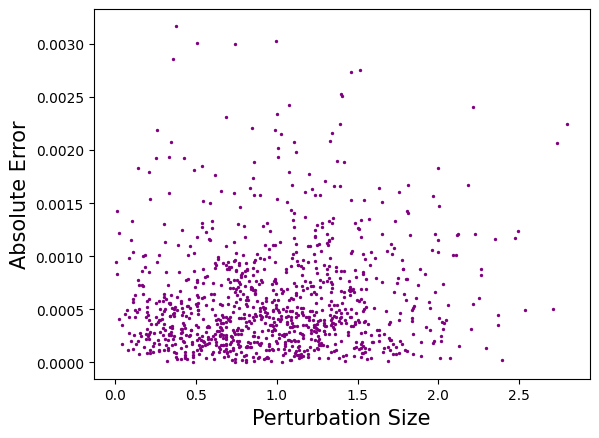

In [12]:
plt.scatter(msps, mses, s=2, color='purple')
plt.xlabel('Perturbation Size', fontsize=15)
plt.ylabel('Absolute Error', fontsize=15)
plt.show()

[Text(0.5, 0, 'Perturbation Size'), Text(0, 0.5, 'Fractional Error'), None]

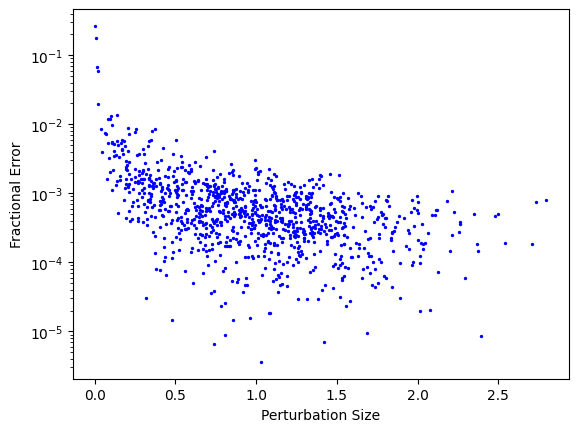

In [73]:
fig, ax = plt.subplots()

ax.scatter(msps, mses/msps, s=2, color='blue')
ax.set(
    xlabel='Perturbation Size',
    ylabel='Fractional Error',
    yscale='log',
)

TypeError: 'str' object is not callable

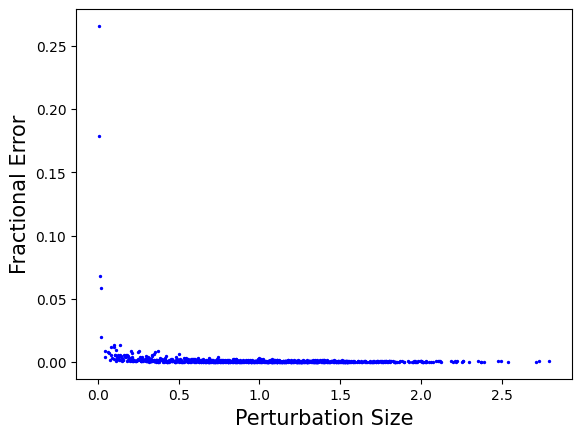

In [70]:
plt.scatter(msps, mses/msps, s=2, color='blue')
plt.xlabel('Perturbation Size', fontsize=15)
plt.ylabel('Fractional Error', fontsize=15)
plt.yscale('log')
plt.show()

In [71]:
plt.yscale

'log'

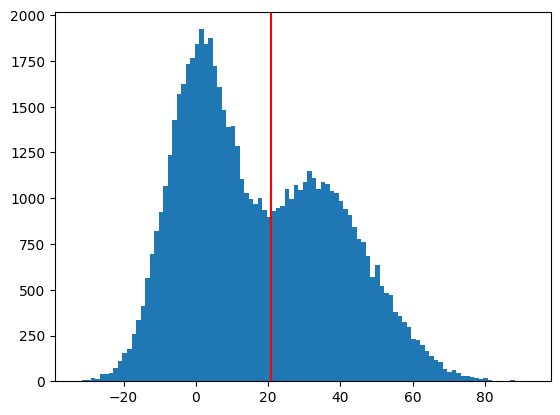

In [67]:
i=2
donut1=test[i]['image']
plt.hist(donut1.flatten(), bins=100);
plt.axvline(2.3*np.sqrt(test[i]['background']), c='r')